<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/Copy_of_M3_MP3_NB_Essential_Genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: Prediction of Essential Genes from Networks

## Learning Objectives

At the end of the mini project, you will be able to -

* Get an understanding of the dataset.
* Build and analyze Networks (or Graphs)
* Extract features from the network
* Predict Essential Genes using the classification algorithm

## Information

### Background of the project

This Mini-Project is based on the research work based out of Robert Bosch Center for Data Science and Artificial Intelligence (RBCDSAI) at IIT Madras. More details can be found in this article [https://doi.org/10.3389/fgene.2021.722198](https://www.frontiersin.org/articles/10.3389/fgene.2021.722198/full).

The goal of this project is to apply machine learning to predict Essential Genes using the Protein network as the features of the STRING dataset.

### About the paper cited above

Features Used in the Paper

267 Genetic Featues + 16 Network Centrality features.

12 Centralities [1 to 12] + 4 other Auxillary network metrics

These features are computed from the graph. Once extracted, they translate the Omics-Data into a typical machine learning data, which can be further developed with Machine learning Models.


### About the Dataset

The dataset will be directly downloaded from the [String Database](https://string-db.org/cgi/download) , in a very convenient manner. 
We are downloading and working on the bacterium *Actinomyces coleocanis* as it is a small dataset suitable for the runtime and quick reruns.
[Actinomyces coleocanis](https://stringdb-static.org/download/protein.links.v11.5/525245.protein.links.v11.5.txt.gz) will be downloaded and unzipped. The text file contains 3 columns - protein1, protein2 and score.
This 3 column data is a graph data.

The Netgenes contains essential gene predictions for 2,700+ bacteria predicted using features derived from STRING protein–protein functional association networks. It contains a re fined version to access and download the data with some information as well. The dataset contains the essential genes for each bacteria. 
Clicking on the specific bacteria name will navigate to an interactive
page. 
[Netgenes Database](https://rbc-dsai-iitm.github.io/NetGenes/)


### Small note on Proteins

Proteins are large, complex molecules that play many critical roles in the body. They are necessary for building the structural components of the human body, such as muscles and organs. Proteins also determine how the organism looks, how well its body metabolises food or fights infection and sometimes even how it behaves. Proteins are chains of chemical building blocks called amino acids. A protein may contain a few amino acids or it could have several thousands.



### Small note on Genes

A gene is a basic unit of heredity in a living organism that normally resides in long strands of DNA called chromosomes. Genes are coded instructions that decide what the organism is like, how it behaves in its environment and how it survives. They hold the information to build and maintain an organism’s cells and pass genetic traits to offspring. A gene consists of a long combination of four different nucleotide bases namely adenine, cytosine, guanine and thymine.


### Relationship between GENES and PROTEINS
Gene and protein are two functionally-related entities found in the cell of an living organism.
Most genes contain the information require to make proteins. Please note Gene is not a part of Protein and vice-versa.
For more information, click [Here](https://pediaa.com/difference-between-gene-and-protein/).




### Importance of Essential Genes
Essential genes are genes required for a cell or an organism to survive. Some of the functinalities are cell growth and metabolism, cell reproduction, its well-being etc. Disruption or deletion of such genes causes cell death, indicating that these genes perform essential biological functions. A majority of the Genes in an organism are NON-ESSENTIAL. Only a small fraction are Essential.

**Python Packages used:**  
* [`networkx`](https://networkx.org/documentation/stable/_downloads/networkx_reference.pdf) for graph analysis
* [`requests`](https://docs.python-requests.org/en/latest/) for fetching data over the internet 
* [`Pandas`](https://pandas.pydata.org/docs/reference/index.html) for data frames and easy to read csv files  
* [`Numpy`](https://numpy.org/doc/stable/reference/index.html#reference) for array and matrix mathematics functions  
* [`sklearn`](https://scikit-learn.org/stable/user_guide.html) for the metrics and pre-processing
* [`seaborn`](https://seaborn.pydata.org/) and [`matplotlib`](https://matplotlib.org/) for plotting


## Importing the packages

In [ ]:
### The required libraries and packages ###
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter
from operator import itemgetter
from google.colab import drive
import os
from tqdm import tqdm
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import networkx as nx

## Importing the Data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Week 3 (Health Care)/'
df_raw = pd.read_csv(path+'525245.protein.links.v11.5.txt', sep = '\s')
print(df_raw.shape)
df_raw.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


(213398, 3)


,protein1,protein2,combined_score
0,525245.HMPREF0044_0001,525245.HMPREF0044_1430,635
1,525245.HMPREF0044_0001,525245.HMPREF0044_1224,170
2,525245.HMPREF0044_0001,525245.HMPREF0044_0084,164
3,525245.HMPREF0044_0001,525245.HMPREF0044_0281,165
4,525245.HMPREF0044_0001,525245.HMPREF0044_0968,165


In [ ]:
df = df_raw.copy()
df.head()

,protein1,protein2,combined_score
0,525245.HMPREF0044_0001,525245.HMPREF0044_1430,635
1,525245.HMPREF0044_0001,525245.HMPREF0044_1224,170
2,525245.HMPREF0044_0001,525245.HMPREF0044_0084,164
3,525245.HMPREF0044_0001,525245.HMPREF0044_0281,165
4,525245.HMPREF0044_0001,525245.HMPREF0044_0968,165


In [ ]:
print(f"df.shape = {df.shape}")
n_uniq_protein1 = df["protein1"].nunique()
n_uniq_protein2 = df["protein2"].nunique()
print(f"n_uniq_protein1 = {n_uniq_protein1}, n_uniq_protein2 = {n_uniq_protein2}")

df.nunique()

df.shape = (213398, 3)
n_uniq_protein1 = 1530, n_uniq_protein2 = 1530


protein1          1530
protein2          1530
combined_score     850
dtype: int64

In [ ]:
df.isnull().sum()

protein1          0
protein2          0
combined_score    0
dtype: int64

## Graded Exercises (10 points)

Exercises 1 to 4 deal with the data, the graph structure, its visualization and data preparation of **FEATURES** only.

Exercises 5 deals with linking the Feature data with the target data 

Exercise 6 deals with the classification model.

### Exercise 1 (1 point): Create the networkx graph object

**Hint** : Use the `networkx`'s function `add_weighted_edges_from`

In [ ]:
# YOUR CODE HERE
graph = nx.Graph()
for i in range(len(df)):
    node=df.loc[i,:][0] # first column as node
    next_node=df.loc[i,:][1]# first column as  node
    weight=df.loc[i,:][2] # third column as edge cost/weight
    graph.add_weighted_edges_from([(node,next_node,weight)])
    #print(node,next_node,weight) 
graph

Streaming output truncated to the last 5000 lines.
525245.HMPREF0044_1504 525245.HMPREF0044_1186 187
525245.HMPREF0044_1504 525245.HMPREF0044_0231 176
525245.HMPREF0044_1504 525245.HMPREF0044_0581 153
525245.HMPREF0044_1504 525245.HMPREF0044_0106 450
525245.HMPREF0044_1504 525245.HMPREF0044_0621 319
525245.HMPREF0044_1504 525245.HMPREF0044_1317 247
525245.HMPREF0044_1504 525245.HMPREF0044_1455 516
525245.HMPREF0044_1504 525245.HMPREF0044_0837 221
525245.HMPREF0044_1504 525245.HMPREF0044_0416 273
525245.HMPREF0044_1504 525245.HMPREF0044_1247 208
525245.HMPREF0044_1504 525245.HMPREF0044_1349 162
525245.HMPREF0044_1504 525245.HMPREF0044_1426 221
525245.HMPREF0044_1504 525245.HMPREF0044_0535 153
525245.HMPREF0044_1504 525245.HMPREF0044_1233 337
525245.HMPREF0044_1504 525245.HMPREF0044_1505 963
525245.HMPREF0044_1504 525245.HMPREF0044_0782 250
525245.HMPREF0044_1504 525245.HMPREF0044_0790 516
525245.HMPREF0044_1504 525245.HMPREF0044_0598 678
525245.HMPREF0044_1504 525245.HMPREF0044_1529 678

### Exercise 2 (2 points): Network Analysis

Provide the following Graph parameters

1. Display the information of the network, using networks using `networkx`'s    `.info`
2. Compute number of nodes, number of edges and the average degree of the network using  `networkx`'s   `.number_of_nodes `,   `.number_of_edges ` and `.degree` of each node and then taking its average`
3. Density of a network  using  `networkx`'s   `.density`
4. Compute the minimum Spanning Tree using  `networkx`'s   `.minimum_spanning_tree` and draw it using  `.spring_layout` and `.draw_networkx`
5. Determine the Diameter and Center of the graph  using  `networkx`'s   `.diameter` and `.center`
6. Visualise the degree distribution using a histogram    using  `networkx`'s   `.degree`
7. List the components in a network   using  `networkx`'s   `.connected_components`
8. Create a subrgraph   using  `networkx`'s. `.subgraph` and Print the largest Component of the network using the `max` of components
`

**Hints**: Refer to the `nx.<method>` highlighted above to achieve the respective tasks

(-0.5482148575782776,
 1.084611122608185,
 -1.1488668479025363,
 0.5666470386087894)

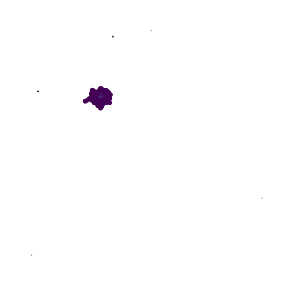

In [ ]:
pos = nx.spring_layout(graph)
#calculate betweeness centrality 
betCent = nx.betweenness_centrality(graph, normalized=True, endpoints=True)

#node color varies with Degree
node_color = [20000.0 * graph.degree(v) for v in graph] 

# node size varies with betweeness centrality
node_size =  [v * 10000 for v in betCent.values()]

#create figure
plt.figure(figsize=(5,5))
nx.draw_networkx(graph, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')

In [ ]:
# This is just a guideline.
# Please use seperate cells to perfom the required tasks

print(nx.info(graph))
#===========================================
# Compute number of nodes, number of edges 
# and the average degree of the network "g"
#===========================================
# YOUR CODE HERE
N,K = graph.order(), graph.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Graph with 1530 nodes and 106699 edges
Nodes:  1530
Edges:  106699
Average degree:  69.73790849673203


In [ ]:
#===========================================
# Compute the density of 
#===========================================
# YOUR CODE HERE
nx.density(graph)

0.09122028580344281

Graph with 1530 nodes and 1524 edges


(-1.1730360323190687,
 0.82099824488163,
 -0.9531957471370698,
 0.7820380294322968)

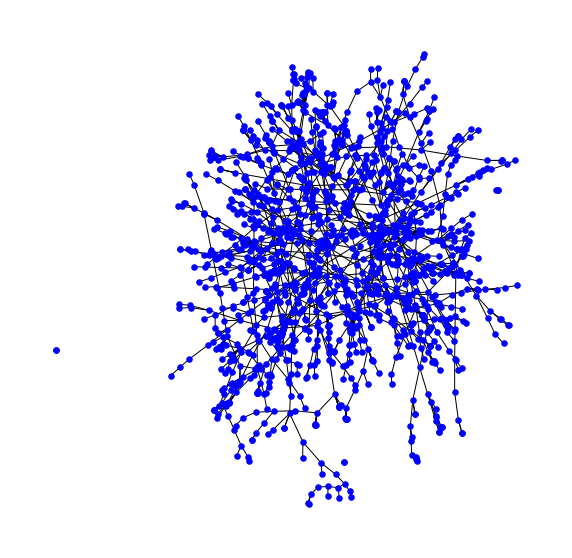

In [ ]:
#===========================================
# Compute the minimum spanning tree in the 
# network "g" and draw it.
#===========================================
# YOUR CODE HERE
T = nx.minimum_spanning_tree(graph)
print(nx.info(T))
#list(T.edges(data=False))
pos = nx.spring_layout(T)
plt.figure(figsize=(10,10))
nx.draw_networkx(T, pos=pos, with_labels=False,
                 node_color='b',
                 node_size= 30 )
plt.axis('off')

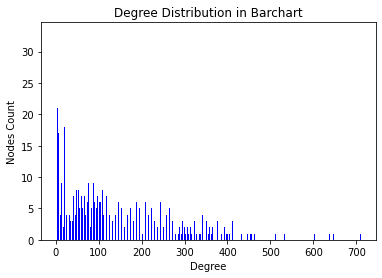

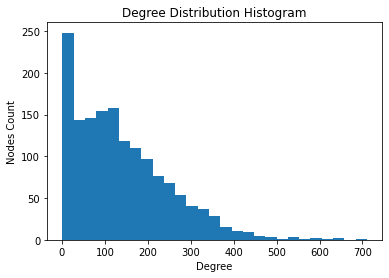

In [ ]:
#===========================================
# Draw the degree distribution histogram.
#===========================================
# YOUR CODE HERE

#take degrees from network(g)
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
#print(degree_sequence)

#count  degree frequency
degreeCount = Counter(degree_sequence)
#print(degreeCount)

#separate degree for x-axis and its counts for y-axis
deg, cnt = zip(*degreeCount.items())
#print(deg,cnt)


#create figure
fig, ax = plt.subplots()
#ax.plot(deg, cnt, 'ro-')
ax.bar(deg, cnt, width=0.50, color='b') #creates bar chart graph of degree showing no. of nodes
plt.title("Degree Distribution in Barchart")
plt.xlabel("Degree")
plt.ylabel("Nodes Count")
plt.show()


'''Alternative way to plot histrogam of the degree in netowrk (g) by using 'hist' fucntion in matplotlib'''

#create histogram for degree
plt.hist(degree_sequence, bins='auto') #auto bin size is used
plt.title("Degree Distribution Histogram")
plt.xlabel("Degree")
plt.ylabel("Nodes Count")
plt.show()

In [ ]:
#===========================================
# Compute largest connected component (LC) 
# of the network "g"
#===========================================
# YOUR CODE HERE
largest_cc = max(nx.connected_components(graph), key=len)

{'525245.HMPREF0044_0553',
 '525245.HMPREF0044_0360',
 '525245.HMPREF0044_0846',
 '525245.HMPREF0044_0404',
 '525245.HMPREF0044_0664',
 '525245.HMPREF0044_0168',
 '525245.HMPREF0044_0603',
 '525245.HMPREF0044_0798',
 '525245.HMPREF0044_0616',
 '525245.HMPREF0044_0096',
 '525245.HMPREF0044_0840',
 '525245.HMPREF0044_1369',
 '525245.HMPREF0044_1457',
 '525245.HMPREF0044_0294',
 '525245.HMPREF0044_0639',
 '525245.HMPREF0044_1265',
 '525245.HMPREF0044_0196',
 '525245.HMPREF0044_0787',
 '525245.HMPREF0044_1182',
 '525245.HMPREF0044_1482',
 '525245.HMPREF0044_0057',
 '525245.HMPREF0044_0028',
 '525245.HMPREF0044_1423',
 '525245.HMPREF0044_1001',
 '525245.HMPREF0044_1020',
 '525245.HMPREF0044_0541',
 '525245.HMPREF0044_0145',
 '525245.HMPREF0044_0477',
 '525245.HMPREF0044_0439',
 '525245.HMPREF0044_1130',
 '525245.HMPREF0044_1432',
 '525245.HMPREF0044_0133',
 '525245.HMPREF0044_0075',
 '525245.HMPREF0044_0605',
 '525245.HMPREF0044_0751',
 '525245.HMPREF0044_1415',
 '525245.HMPREF0044_0975',
 

In [ ]:
#===========================================
# List the components in the network "g"
#===========================================
# YOUR CODE HERE
[len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)]

[1517, 4, 3, 2, 2, 2]

In [ ]:

#===========================================
# Get the SubGraph
#===========================================
# YOUR CODE HERE

### Exercise 3  (3 points): Centrality Feature Extraction

Compute the Centralities

The reason we need centralities is already established in the introduction. We are generating features for the network data to transform the network data into a Machine-learning features.

For specific information, click the link adjacent to the name, or for a full list click [here](https://networkx.org/documentation/stable/reference/algorithms/centrality.html#reaching).


In the graph/network analysis, centrality measures are vital tools for understanding the networks in detail.

These algorithms use graph theory to calculate the importance of any given node in a network. They cut through noisy data, revealing parts of the network that need attention – but they all work differently. Each measure has its own definition of 'importance'. There are plenty of parameters.
However, the following network metrics are used in the paper.



1. **closeness centrality** [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality) {**has been provided as an example with code in the next cell**},
2. betweenness centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality),
3. degree centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality),
4. eigenvector centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality),
5. subgraph centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.subgraph_centrality.html#networkx.algorithms.centrality.subgraph_centrality),
8. load centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.load_centrality.html#networkx.algorithms.centrality.load_centrality),
9. harmonic centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.harmonic_centrality.html#networkx.algorithms.centrality.harmonic_centrality),
10. reaching (local) centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.local_reaching_centrality.html#networkx.algorithms.centrality.local_reaching_centrality),
11. pagerank [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html),
12. clustering coefficient [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering),
13. average_neighbor_degree [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.average_neighbor_degree.html)

**Note**: 

- Most of the methods mentioned above return a dictionary ( key-value pairs of node_name: value)

- Some of the methods mentioned above return only 1 number, So make sure to look into the documentation as to what it returns. In that case run the method for each node to create a dictionary of node-names and its values.

In [ ]:
# closeness centrality
centrality_closeness = nx.closeness_centrality(g)

df_centrality_closeness = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_closeness"])
df_centrality_closeness["protein1"] = list(centrality_closeness.keys())
df_centrality_closeness["centrality_closeness"] = list(centrality_closeness.values())
df_centrality_closeness = df_centrality_closeness.set_index("protein1")
df_centrality_closeness.head(2)

In [ ]:
# betweenness centrality

# YOUR CODE HERE

In [ ]:
# degree centrality

# YOUR CODE HERE

In [ ]:
# eigenvector centrality

# YOUR CODE HERE

In [ ]:
# subgraph centrality

# YOUR CODE HERE

In [ ]:
# information centrality

# YOUR CODE HERE

In [ ]:
# random-walk centrality

# YOUR CODE HERE

In [ ]:
# load centrality

# YOUR CODE HERE

In [ ]:
# harmonic centrality

# YOUR CODE HERE

In [ ]:
# local reaching centrality

# YOUR CODE HERE

In [ ]:
# pagerank

# YOUR CODE HERE

In [ ]:
# clustering coefficient

# YOUR CODE HERE

In [ ]:
# average_neighbor_degree

# YOUR CODE HERE

### Exercise 4 (2 points): Feature Engineering and Data Preparation

 - Add the above computed values as new columns to the existing dataframe to form new features for machine learning. 
 - Remove the columns *protein2* and the *combined_score*
 - Check for the null values. Drop if any
 - Scale the values of each column
 - Check for correlations of every feature with every other using `seaborn`'s **annotated heatmap**. Drop one of the features in the pair which exhibits a high correlation coefficient, *i.e.* $r>0.9$

In [ ]:
#Add the above computed values as new columns to the existing dataframe to form new features for machine learning.

# YOUR CODE HERE

In [ ]:
# Check for the null values. Drop if any

# YOUR CODE HERE

In [ ]:
# Scale the features

# YOUR CODE HERE

In [ ]:
# Display the correlation matrix using Heatmap

# YOUR CODE HERE

In [ ]:
# Drop Highly Correlating Pairs of features

# YOUR CODE HERE

### Excerice 5 (1 Point) : Target Data

Obtain the Target Data from the file **"Actinomyces coleocanis.csv"**

In [ ]:
df_target = pd.read_csv(path + "Actinomyces_coleocanis_Essential_Genes.csv")
print(df_target.shape)
df_target.head(3)

In [ ]:
# Create a list (or a set or numpy array) of Essential Genes from the above DataFrame
# YOUR CODE HERE

In [ ]:
# Create a new feature called "gene_essentiality"
# Assign 1 to the protein1 if it is present in the list of essential genes
# This becomes your target variable

# YOUR CODE HERE

### Exercise 6 (1 point) : Gene Essentiality Classification

Determine the Essential Protein using any of your favourite `sklearn`'s classifier models

- Split the data into training and testing datasets
- Build a model, fit and predict
- Print the classification report, Confusion Matrix and ROC curve

In [ ]:
# Train-test split the features and target

# YOUR CODE HERE

In [ ]:
# Instantiate a model (Classifier)
# YOUR CODE HERE

# Fit on Train data
# YOUR CODE HERE

# Predict on test data
# YOUR CODE HERE

In [ ]:
# Print the confusion Matrix
# YOUR CODE HERE

# Print the classification Report
# YOUR CODE HERE

# Plot the ROC Curve
# YOUR CODE HERE

#### Discuss your findings and the learning that happened with this mini-project to your Mentor.

## Additional Ungraded Exercise for Practice:

- Try out for other smaller data sets from the [STRING DB LINK](https://string-db.org/cgi/download). Select a species name for example example dog, human, cat etc. It will display the corresponding latin name. Download all the relevant Datasets, explore and use them